In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets
print((m,n))

(42000, 785)


In [4]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]  # label
X_dev = data_dev[1:n]
X_dev = X_dev / 255.   #Normalization

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [5]:
n_train,m_train = X_train.shape
print(n_train,m_train)

784 41000


In [6]:
def init_params():
    W1 = np.random.uniform(-0.5, 0.5, (10, 784))
    b1 = np.random.uniform(-0.5, 0.5, (10, 1))
    W2 = np.random.uniform(-0.5, 0.5, (10, 10))
    b2 = np.random.uniform(-0.5, 0.5, (10, 1))
    return W1,b1,W2,b2

In [7]:
def Relu(z):
    return np.maximum(0,z)

In [8]:
def Softmax(Z):
    A = np.exp(Z)/ sum(np.exp(Z))
    return A

In [9]:
def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = Relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = Softmax(Z2)
    return Z1, A1, Z2, A2

In [10]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1)) #Y.size = m , Y.max + 1 = 9 +1
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T #to match the A matrix size
    return one_hot_Y

In [11]:
def deriv_Relu(Z):
    return Z > 0

In [12]:
def back_prop(Z1,A1,Z2,A2,W2,X,Y):
    m =Y.size
    one_hot_Y= one_hot(Y)
    dz2 = A2 - one_hot_Y
    dw2 = 1 / m * dz2.dot(A1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = W2.T.dot(dz2) * deriv_Relu(Z1)
    dw1 = 1 / m * dz1.dot(X.T)
    db1 = 1 / m * np.sum(dz1)
    
    return dw1 , db1 ,dw2,db2

In [13]:
def ubdate_params(W1, b1 , W2 ,b2 ,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    
    return W1 , b1 ,W2 ,b2

In [15]:
def get_predictions(A2):
    return np.argmax(A2 , 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X,Y,iteration,alpha):
    W1 , b1 ,W2 ,b2 = init_params()
    for i in range(iteration):
        Z1, A1, Z2, A2 = forward_prop(W1 , b1 ,W2 ,b2,X)
        dw1,db1 ,dw2,db2 = back_prop(Z1, A1, Z2, A2,W2,X,Y)
        W1 , b1 ,W2 ,b2 = ubdate_params(W1 , b1 ,W2 ,b2,dw1,db1 ,dw2,db2,alpha)
        if i % 10 == 0:
            print("iteration: ", i)
            print("Accuracy: ",get_accuracy(get_predictions(A2),Y))
    return W1 , b1 ,W2 ,b2

In [23]:
W12, b12, W22, b22 = gradient_descent(X_train, Y_train,1500,0.10)

iteration:  0
[6 7 7 ... 3 6 7] [0 4 1 ... 8 8 4]
Accuracy:  0.0628780487804878
iteration:  10
[0 7 7 ... 0 3 7] [0 4 1 ... 8 8 4]
Accuracy:  0.1757560975609756
iteration:  20
[0 7 1 ... 0 3 7] [0 4 1 ... 8 8 4]
Accuracy:  0.2547317073170732
iteration:  30
[0 7 1 ... 0 3 7] [0 4 1 ... 8 8 4]
Accuracy:  0.290390243902439
iteration:  40
[0 7 1 ... 0 3 7] [0 4 1 ... 8 8 4]
Accuracy:  0.33251219512195124
iteration:  50
[0 7 1 ... 0 3 7] [0 4 1 ... 8 8 4]
Accuracy:  0.3759268292682927
iteration:  60
[0 7 1 ... 0 3 7] [0 4 1 ... 8 8 4]
Accuracy:  0.4173170731707317
iteration:  70
[0 7 1 ... 0 3 7] [0 4 1 ... 8 8 4]
Accuracy:  0.4483170731707317
iteration:  80
[0 7 1 ... 0 3 4] [0 4 1 ... 8 8 4]
Accuracy:  0.4781219512195122
iteration:  90
[0 7 1 ... 0 3 4] [0 4 1 ... 8 8 4]
Accuracy:  0.5108536585365854
iteration:  100
[0 7 1 ... 0 3 4] [0 4 1 ... 8 8 4]
Accuracy:  0.536829268292683
iteration:  110
[0 7 1 ... 0 3 4] [0 4 1 ... 8 8 4]
Accuracy:  0.5610243902439025
iteration:  120
[0 7 1 ... 0

In [24]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


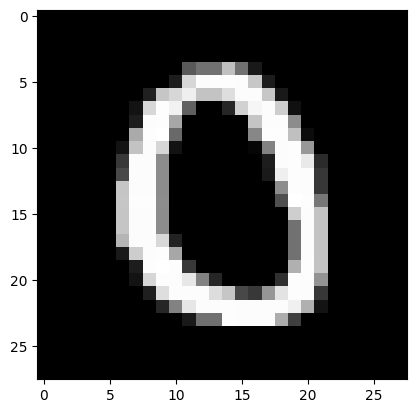

In [25]:
test_prediction(4,W1,b1,W2,b2)

Prediction:  [1]
Label:  1


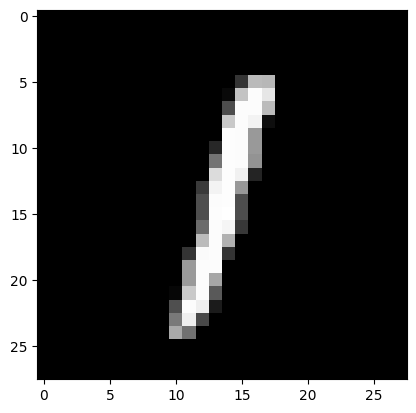

In [26]:
test_prediction(5,W1,b1,W2,b2)

Prediction:  [4]
Label:  4


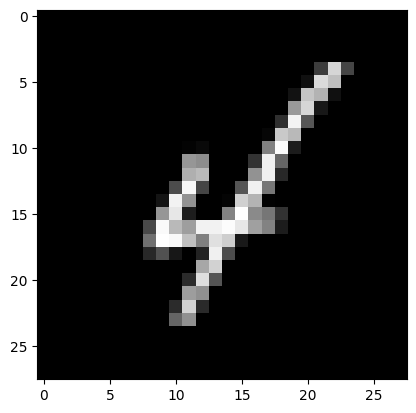

In [27]:
test_prediction(1,W1,b1,W2,b2)


Prediction:  [8]
Label:  8


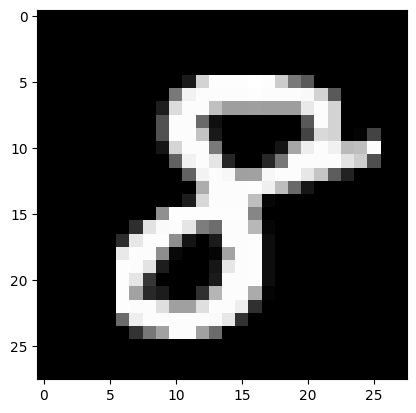

In [28]:
test_prediction(20,W1,b1,W2,b2)

Prediction:  [7]
Label:  7


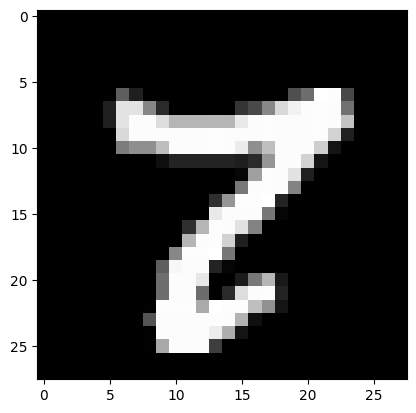

In [29]:
test_prediction(200,W1,b1,W2,b2)
